# Bank Customer Churn Prediction
In this kernel I am going to make an __Exploratory Data Analysis (EDA)__ on [this](https://www.kaggle.com/filippoo/deep-learning-az-ann) dataset. Also I am going to make different predictive models and find out the best one with highest prediction accuracy. 

### Kernel Outlines:
* __Importing Necessary Packages__
* __Statistical Summary of the Dataset__
* __Dropping Irrelevant Features__
* __One Hot Encoding__
* __Data Visualization__
* __Detecting Outliers using Tukey Boxplot__
* __Hand written function for detecting and removing outliers__
* __Checking Correlation with Heatmap__
* __Different ML predictive models__
    * Gaussian Naive Bayes
    * Logistic Regression
    * Decision Tree
    * Random Forest
    * Extra Gradient Boosting Tree (XGBoost)
* __Improve the Predictive Model__
    * Feature Scaling
    * Over Sampling

### Importing Necessary Packages

In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(palette="Set2")

from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from mlxtend.plotting import plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.pipeline import Pipeline as imbPipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier, plot_importance
from imblearn.over_sampling import SMOTE

In [5]:
# read dataset
dataset = pd.read_csv("../input/Churn_Modelling.csv")

In [6]:
# first five row of the dataset
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### __The statistical summary of the dataset__

In [7]:
dataset.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
# checking datatypes and null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


### Dropping Irrelevant Feature
`RowNumber`, `CustomerId` and `Surname` are irrelivant, so we drop those features.

In [9]:
dataset.drop(["RowNumber","CustomerId","Surname","Geography"], axis=1, inplace=True)

## Data Visualization 

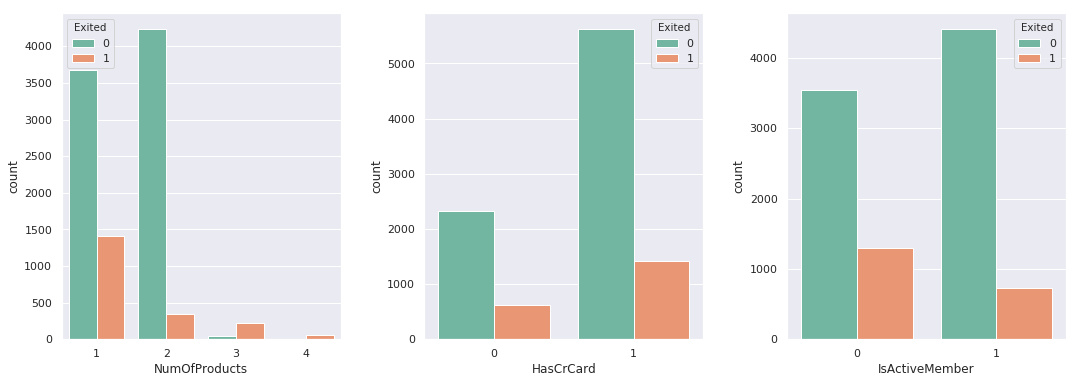

In [10]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.countplot(x = "NumOfProducts", hue="Exited", data = dataset, ax= ax[0])
sns.countplot(x = "HasCrCard", hue="Exited", data = dataset, ax = ax[1])
sns.countplot(x = "IsActiveMember", hue="Exited", data = dataset, ax = ax[2])

__Customer with 3 or 4 products are higher chances to Churn__

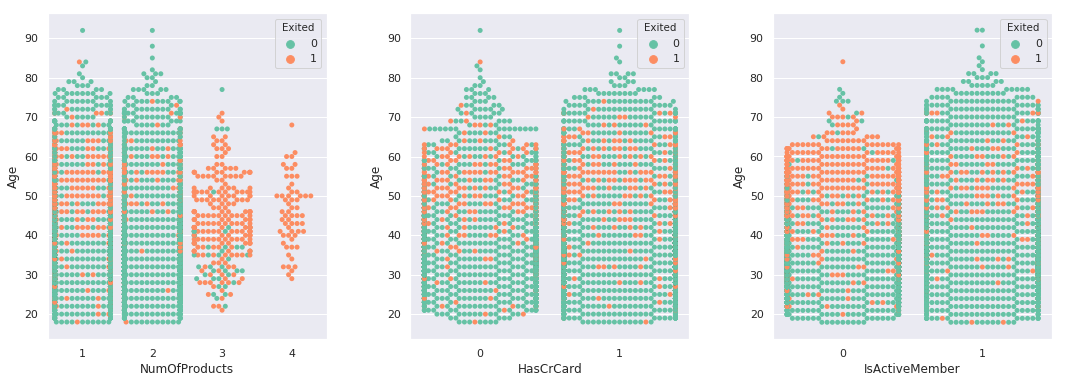

In [11]:
_, ax = plt.subplots(1, 3, figsize=(18, 6))
plt.subplots_adjust(wspace=0.3)
sns.swarmplot(x = "NumOfProducts", y = "Age", hue="Exited", data = dataset, ax= ax[0])
sns.swarmplot(x = "HasCrCard", y = "Age", data = dataset, hue="Exited", ax = ax[1])
sns.swarmplot(x = "IsActiveMember", y = "Age", hue="Exited", data = dataset, ax = ax[2])

In [ ]:
# encoder = LabelEncoder()
# dataset["Geography"] = encoder.fit_transform(dataset["Geography"])
# dataset["Gender"] = encoder.fit_transform(dataset["Gender"])

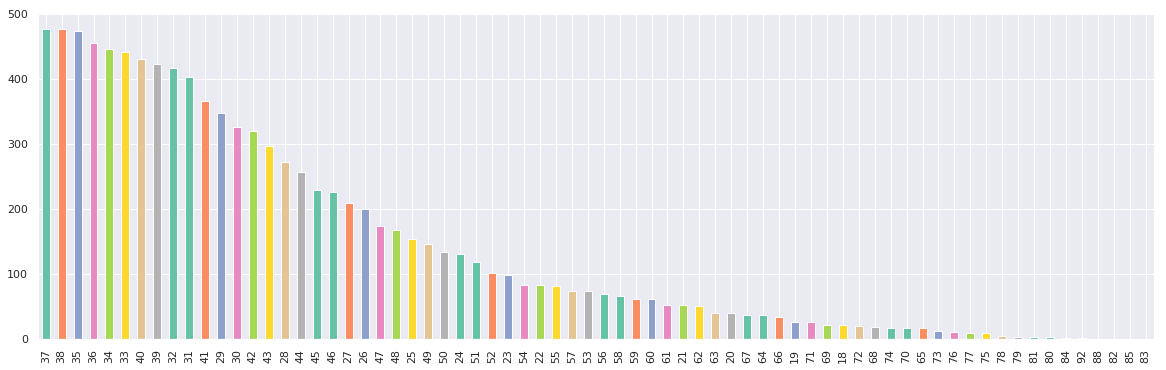

In [12]:
dataset["Age"].value_counts().plot.bar(figsize=(20,6))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


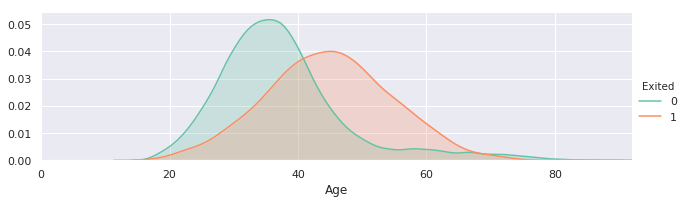

In [13]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Age",shade= True)
facet.set(xlim=(0, dataset["Age"].max()))
facet.add_legend()

plt.show()

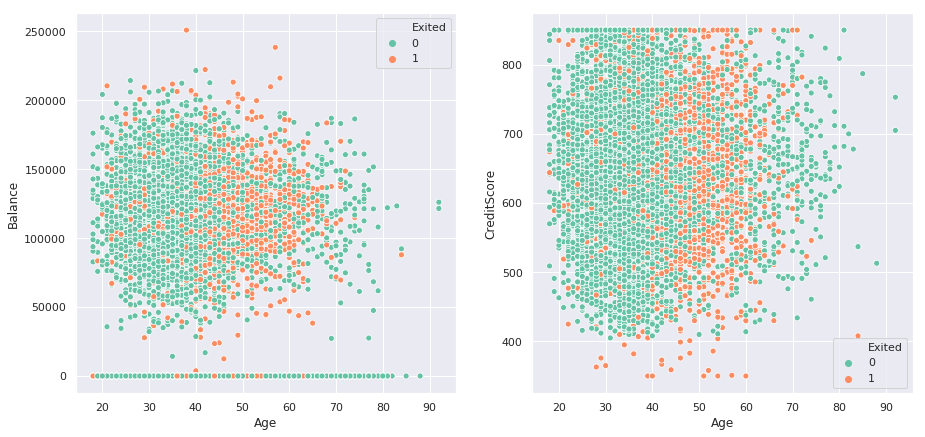

In [14]:
_, ax =  plt.subplots(1, 2, figsize=(15, 7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.scatterplot(x = "Age", y = "Balance", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[0])
sns.scatterplot(x = "Age", y = "CreditScore", hue = "Exited", cmap = cmap, sizes = (10, 200), data = dataset, ax=ax[1])

> * __40 to 70 years old customers are higher chances to churn__
* __Customer with `CreditScore` less then `400` are higher chances to churn__

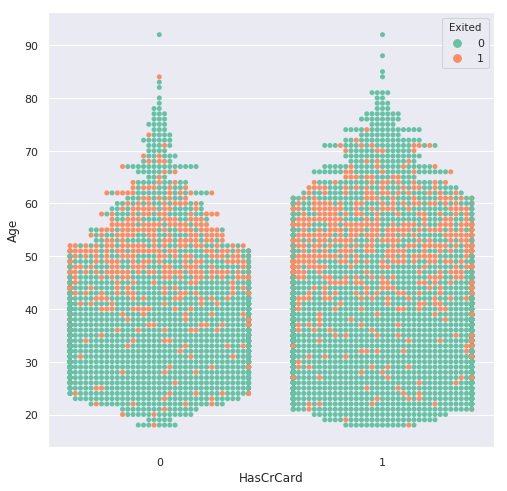

In [15]:
plt.figure(figsize=(8, 8))
sns.swarmplot(x = "HasCrCard", y = "Age", data = dataset, hue="Exited")

In [1]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"Balance",shade= True)
facet.set(xlim=(0, dataset["Balance"].max()))
facet.add_legend()

plt.show()

NameError: name 'sns' is not defined

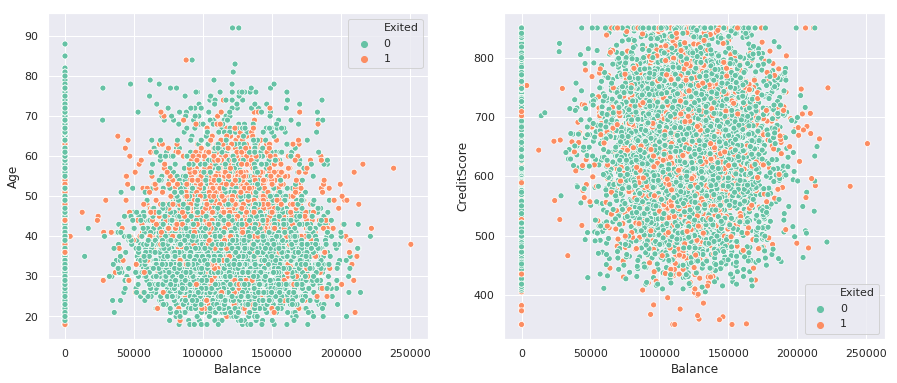

In [17]:
_, ax = plt.subplots(1, 2, figsize=(15, 6))
sns.scatterplot(x = "Balance", y = "Age", data = dataset, hue="Exited", ax = ax[0])
sns.scatterplot(x = "Balance", y = "CreditScore", data = dataset, hue="Exited", ax = ax[1])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


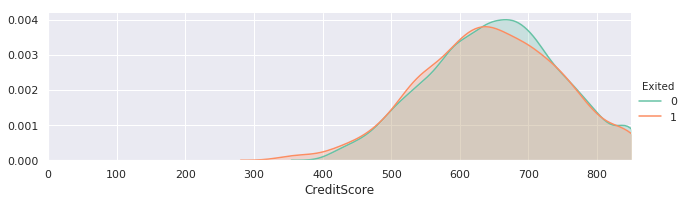

In [18]:
facet = sns.FacetGrid(dataset, hue="Exited",aspect=3)
facet.map(sns.kdeplot,"CreditScore",shade= True)
facet.set(xlim=(0, dataset["CreditScore"].max()))
facet.add_legend()

plt.show()

### __Detecting Outliers using Tukey Boxplot__

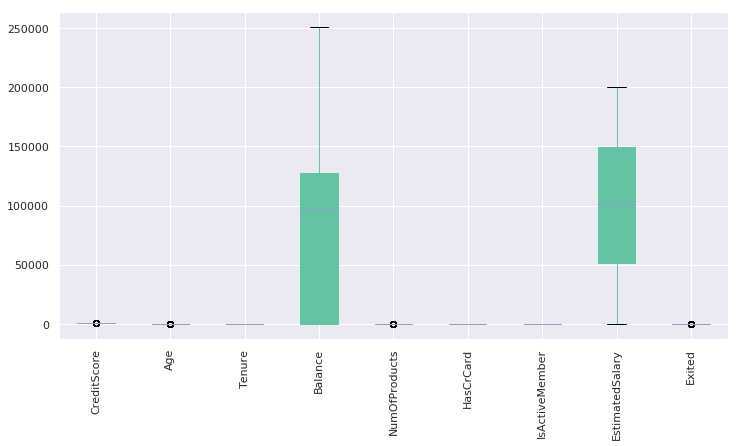

In [19]:
plt.figure(figsize=(12,6))
bplot = dataset.boxplot(patch_artist=True)
plt.xticks(rotation=90)       
plt.show()

### __Checking Correlation__

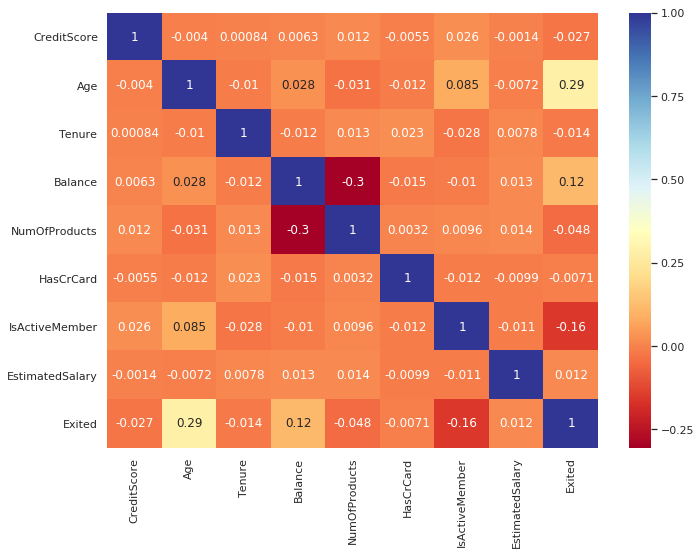

In [21]:
plt.subplots(figsize=(11,8))
sns.heatmap(dataset.corr(), annot=True, cmap="RdYlBu")
plt.show()

## Prediction with ML models:

In [10]:
X = dataset.drop("Exited", axis=1)
y = dataset["Exited"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [12]:
from sklearn.model_selection import PredefinedSplit

split_index = [-1 if x in X_train.index else 0 for x in X.index]

# Use the list to create PredefinedSplit
pds = PredefinedSplit(test_fold = split_index)

In [13]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
CreditScore        10000 non-null int64
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 781.3+ KB


In [14]:
features_numeric=list(X.select_dtypes(include=['float64', 'int64']))

object_col=X.select_dtypes(include=['object'])
for col in object_col.columns.values:
    dataset[col] = X[col].astype("category")
categoric=list(X.select_dtypes(include=['category']))

In [15]:
# define a pipe line for numeric feature preprocessing
transformer_numeric = Pipeline(
    steps=[
        ('scaler', StandardScaler())])
# define a pipe line for categorical feature preprocessing
transformer_categorical = Pipeline(
    steps=[('le',LabelEncoder()
)])
# define the preprocessor 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, categoric)])

In [16]:
# define a pipe line for numeric feature preprocessing
transformer_numeric = Pipeline(
    steps=[
        ('scaler', StandardScaler())])
# define a pipe line for categorical feature preprocessing
transformer_categorical = Pipeline(
    steps=[('le',LabelEncoder()
)])
# define the preprocessor 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, categoric)])

In [17]:
from imblearn.pipeline import Pipeline as imbPipeline


full_pipline = imbPipeline(
    steps=[
        ('preprocessor', preprocessor),('smote',SMOTE()),
        ('my_classifier',XGBClassifier(max_depth = 12,random_state=7, n_estimators=100, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.8),
        )
        
    ]
)

In [18]:
full_pipline

Pipeline(memory=None,
     steps=[('preprocessor', ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
         transformer_weights=None,
         transformers=[('num', Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True))]), ['CreditScore', 'Age', 'Tenure', ...      reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.8))])

In [19]:
scores = cross_validate(full_pipline ,X , y , cv = pds , scoring="accuracy" , return_train_score=True)
print('Train score : ',scores["train_score"].mean())
print('Test score',scores["test_score"].mean())

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Train score :  0.952
Test score 0.842


/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/opt/conda/lib/python3.6/site-packages/sklearn/pipeline.py:451: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


In [21]:
grid_params =     {'my_classifier__max_depth':[8,12,16,18,20],
    'my_classifier__n_estimators': [100, 200,300, 400,500,600],
    'my_classifier__learning_rate': [0.1, 0.01, 0.05]}
# n_jobs means the cucurrent number of jobs
grid_search = GridSearchCV(
    full_pipline, grid_params, cv=pds, verbose=1, n_jobs=2, 
    scoring='accuracy')
grid_search.fit(X , y)

print(grid_search.cv_results_["mean_test_score"].mean())
print(grid_search.cv_results_["mean_train_score"].mean())
print('best score {}'.format(grid_search.best_score_))
print('best param {}'.format(grid_search.best_params_))

Fitting 1 folds for each of 90 candidates, totalling 90 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:  3.4min
[Parallel(n_jobs=2)]: Done  90 out of  90 | elapsed:  7.4min finished
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


0.8424
0.9574569444444445
best score 0.855
best param {'my_classifier__learning_rate': 0.01, 'my_classifier__max_depth': 12, 'my_classifier__n_estimators': 600}


/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


In [22]:
final_model = grid_search.best_estimator_
inputs = X.columns

In [24]:
import joblib
joblib.dump(final_model , "Model.pkl")
joblib.dump( inputs , "Inputs.pkl" )